# 나이브 베이즈 분류기

In [80]:
import numpy as np
X = np.array([[0,1,0,1],
             [1,0,1,1],
             [0,0,0,1],
             [1,0,1,0]])
y = np.array([0,1,0,1])

* 클래스별로 0이 아닌 원소를 세는 과정

In [81]:
counts = {}
for label in np.unique(y):
    
    counts[label] = X[y == label].sum(axis = 0)
print('특성카운트 :\n', counts)

특성카운트 :
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


# 의사결정 트리 시각화

* 의사결정트리의 장점 - 큰수학적 지식이 없어도 트리그림을 보면서 어떻게 예측값이 도출된지 쉽게 알수 있다. 
* tree형태의 각 노드와 leaf노드, root노드 파악해보기
* overfitting(모든 leafnode가 purenode되는것)을 방지하기 위해 사전가지치기(pre_pruning)

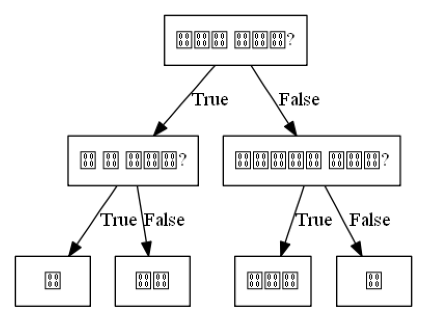

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

import mglearn
mglearn.plots.plot_animal_tree()
plt.show()

# 1. 데이터 적제하기(유방암)

In [83]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

tree = DecisionTreeClassifier(random_state=0)

tree.fit(X_train, y_train)
print('훈련셋 점수 :{:.3f}'.format(tree.score(X_train, y_train)))
print('테스트셋 점수 :{:.3f}'.format(tree.score(X_test, y_test)))

훈련셋 점수 :1.000
테스트셋 점수 :0.937


* max_depth 디폴트 옵션에선 모든 리프노드가 순수노드이기떄문에 훈련셋의 정확도가 100%이다.
* 결정트리의 깊이를 제한하지 않ㅇ으면 트리는 무한정 깊어지고 복잡해질수있다.
* 따라서 가지치기 하지않은 트리는 과대적합하기 쉽고, 새로운 데이터에 일반화되기 힘들다.
* 따라서 완전히 학습되어 깊어지기전에 가지를 쳐내면서 트리의 성장을 멈춰보는것이다. 
* max_depth 옵션에 숫자를 주면 주어진 수만큼 연속된 질문을 최대 4개로 제한해버린다.
* 트리깊이를 제한하면 과대적합이 줄어들어 테스트 세트의 성능이 개선될 수 있다.

In [84]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)

tree.fit(X_train, y_train)
print('훈련셋 점수 :{:.3f}'.format(tree.score(X_train, y_train)))
print('테스트셋 점수 :{:.3f}'.format(tree.score(X_test, y_test)))

훈련셋 점수 :0.988
테스트셋 점수 :0.951


## - 유방함 디시젼 트리 시각화

In [85]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [86]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

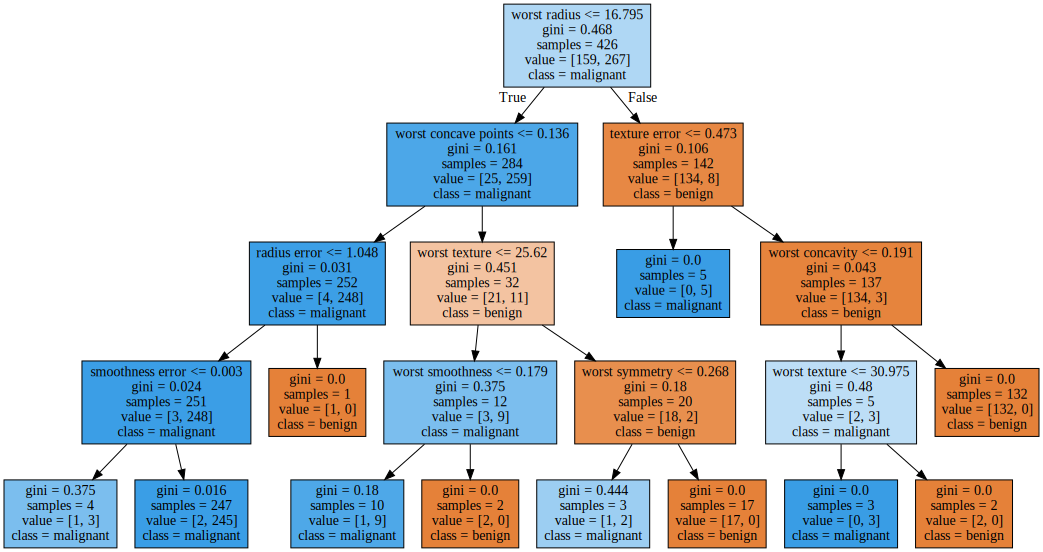

In [87]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = "tree.dot", class_names = ["benign", "malignant"],
               feature_names = cancer.feature_names, impurity = True, filled = True)
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

* 분기가 worst_radius feature 에서 일어나기 때문에, 디시젼 트리에서 가장 중요한 특성이라 할 수 있다.
* samples : 노드안에 들어 있는 데이터의 갯수
* value : 분류값 별 데이터의 갯수
* class : 분류값

## 트리의 특성중요도
* 전체 트리를 보긴 어려우나, 대신 트리가 어떻게 동작하는지 요약하는 속성들을 사용할 수 있다. 
* 특성 중요도 -> 0,1사이의 숫자로 각 특성에 대해 0은 전혀 사용되지않음, 1은 완벽하게 타깃클래스에 예측했다는 뜻이다.
* 트리의 생성에서, 가장 중요하게 사용된 특성의 크기를 나타내는것

In [88]:
print("특성 중요도:\n", tree.feature_importances_)

특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [89]:
for i in range(len(cancer.feature_names)):
    print(cancer.feature_names[i], ' : ', tree.feature_importances_[i])

mean radius  :  0.0
mean texture  :  0.0
mean perimeter  :  0.0
mean area  :  0.0
mean smoothness  :  0.0
mean compactness  :  0.0
mean concavity  :  0.0
mean concave points  :  0.0
mean symmetry  :  0.0
mean fractal dimension  :  0.0
radius error  :  0.010197368202069328
texture error  :  0.0483982536186494
perimeter error  :  0.0
area error  :  0.0
smoothness error  :  0.002415595085315826
compactness error  :  0.0
concavity error  :  0.0
concave points error  :  0.0
symmetry error  :  0.0
fractal dimension error  :  0.0
worst radius  :  0.7268285094603201
worst texture  :  0.045815897088866304
worst perimeter  :  0.0
worst area  :  0.0
worst smoothness  :  0.014157702104714051
worst compactness  :  0.0
worst concavity  :  0.0181879968644502
worst concave points  :  0.12211319926548449
worst symmetry  :  0.01188547831013032
worst fractal dimension  :  0.0


### 트리 특성 중요도 그래프화

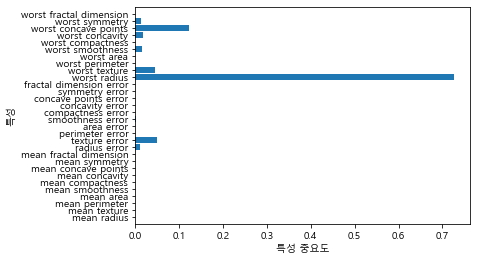

In [90]:
import numpy as np

def plot_feature_importance_cancer(model):
    n_feature = cancer.data.shape[1]
    plt.barh(np.arange(n_feature), model.feature_importances_,align = 'center')
    plt.yticks(np.arange(n_feature), cancer.feature_names)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_feature)
    
plot_feature_importance_cancer(tree)

# 램 가격 활용 실습

Text(0, 0.5, '가격 ($/Mbyte)')

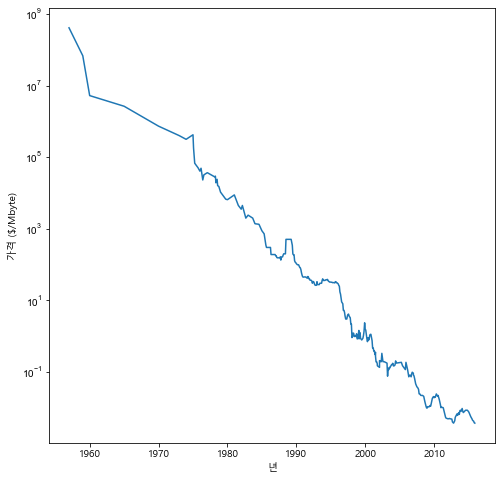

In [102]:
import pandas as pd 
ram_prices = pd.read_csv('../data/ram_price.csv')
plt.subplots(figsize=(8,8))
plt.yticks(fontname = 'Arial')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('년')
plt.ylabel('가격 ($/Mbyte)')

## - 2가지 모델로 예측한 2000년도 이후 ram가격 그래프 
* 날짜 특성하나만으로, 선형회귀모델과 회귀결정 트리모델로 예측해보자

In [93]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >=2000]
# 가격예측을 위해 날짜 특성만을 사용한다. 
X_train = data_train.date[:, np.newaxis]
#타깃과 데이터와의 관계를 간단하게 하기위해 로그 스케일로 변경
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
X_all = ram_prices.date[:,np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

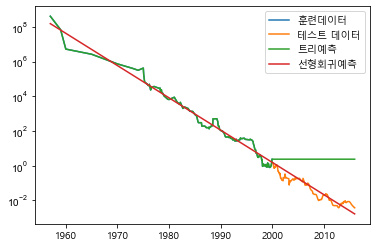

In [94]:
plt.yticks(fontname = 'Arial')
plt.semilogy(data_train.date, data_train.price, label = '훈련데이터')
plt.semilogy(data_test.date, data_test.price, label = '테스트 데이터')
plt.semilogy(ram_prices.date, price_tree, label  = '트리예측')
plt.semilogy(ram_prices.date, price_lr, label = '선형회귀예측')
plt.legend()

* 선형회귀 모델은 직선으로 2000년대 이후를 거의 정확히 예측한다.
* 트리모델은 훈련데이터를 완벽하게 예측한다.
* 하지만 트리의 복잡도에 제한을 두지않아, 전체 훈련데이터를 기억하기 때문에 트리모델은 훈련데이터 밖의 새로운 데이터를 예측할 능력이 없다. 이는 모든 트리기반의 모델의 단점이다.

## 따라서 , 결정트리모델은
* max_depth로 사전 가지치기 매개변수를 조정할 수 있고, 만들어진 모델을 쉽게 시각화 할수 있다,
* 데이터의 스케일에 구애받지 않고 각 특성이 개별적으로 처리된다.
* 하지만 사전 가지치기를 사용한다 해도 과대적합이 될수 있어서 일반화하기가 힘들다고 할수 있다.
* 이러한 과대적합의 문제 대안으로 앙상블 방법을 사용한다.

In [103]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state = 0)

In [109]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
tree3 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

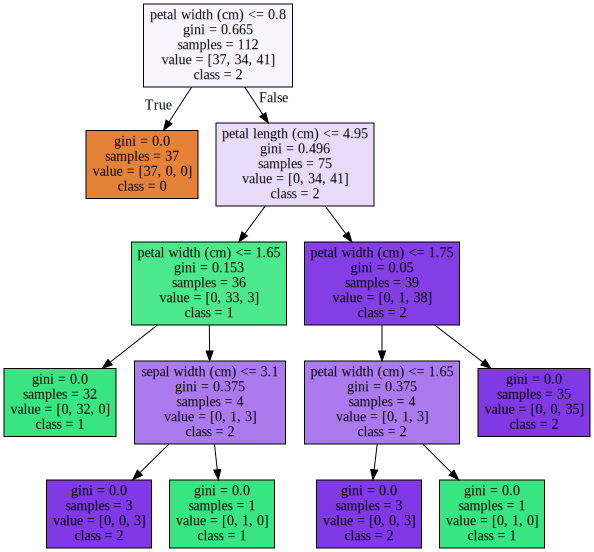

In [110]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = "tree.dot", class_names = ["0", "1","2"],
               feature_names = iris_dataset.feature_names, impurity = True, filled = True)
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))